In [1]:
import numpy as np
import darkopt as dark # can import either entire package
from darkopt import materials, optimize # or import submodules seperately 
import darkopt.plotting as plot
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from scipy.signal import savgol_filter
import time

from matplotlib import rcParams
import matplotlib.cm as cm



nice_fonts = {
        # Use LaTeX to write all text
        #"text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 14,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}

rcParams.update(nice_fonts)
#rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = '--'
rcParams['xtick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['ytick.right'] = True

### Optimzie for Rn

In [29]:
desired_coverage = 0.0025


l_tes0 = 30e-6
l_tes_bnds = [15e-6, 3000e-6]
l_overlap0 = 6e-6
l_overlap_bnds = [5e-06, 20e-6]
l_fin0 = 30e-6
l_fin_bnds = [25e-6, 400e-6]
n_fin0 = 2
n_fin_bnds = [2,6]


rp = 2e-3
ahole = 4.9e-11

w_overlap0 = 'circle'
w_overlap_bnds = [5e-6, 40e-6]
bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fix_w_overlap=True

safety = 200e-6
veff_WAloverlap=.13 # theoretical

res = []
length = []
overlap = []
fin = []
nf = []
surf = []
ntes = []


res_n = np.linspace(6, 10, 100)

for ii in tqdm(range(len(res_n))):
    time.sleep(0.01)
    det1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                        tes_l_overlap0=l_overlap0,
                                                        l_fin0=l_fin0,
                                                        n_fin0=n_fin0,
                                                        per_Al = desired_coverage,   
                                                        fix_w_overlap=fix_w_overlap,
                                                        w_overlap = w_overlap0,
                                                        #tes_width=w,
                                                        abs_type="Si", 
                                                        abs_shape="square", 
                                                        abs_height=1e-3, 
                                                        abs_width=1e-2, 
                                                        w_safety=safety,
                                                        sigma=220000000.0,
                                                        rn=res_n[ii],
                                                        rp=rp,
                                                        L_tot=5e-08,
                                                        ahole=ahole, 
                                                        con_type='ellipse',
                                                        veff_WAloverlap=veff_WAloverlap,
                                                         bounds = bounds, 
                                                        w_overlap_bounds=w_overlap_bnds, 
                                                          verbose=False)
    res.append(det1.calc_res())
    length.append(det1.QET.TES.l)
    overlap.append(det1.QET.TES.l_overlap)
    fin.append(det1.QET.l_fin)
    nf.append(det1.QET.TES.n_fin)
    surf.append(det1._fSA_qpabsorb)
    ntes.append(det1.QET.TES.nTES)
res=np.array(res)
length=np.array(length)
overlap=np.array(overlap)
fin=np.array(fin)
nf=np.array(nf)
surf=np.array(surf)
ntes=np.array(ntes) 
                   
    

    

In [32]:
np.save('res_025_6_10.np', res)
np.save('length_025_6_10.np', length)
np.save('overlap_025_6_10.np', overlap)
np.save('fin_025_6_10.np', fin)
np.save('surf_025_6_10.np', surf)

np.save('ntes_025_6_10.np', ntes)
np.save('nfin_025_6_10.np', nf)

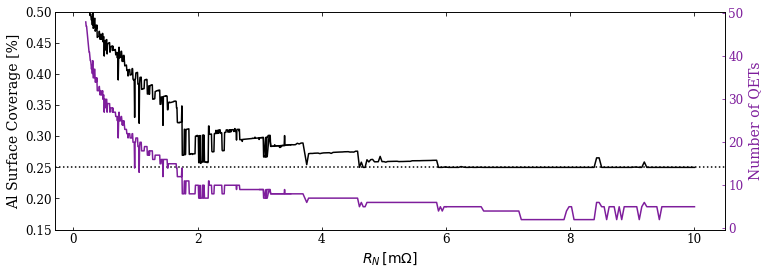

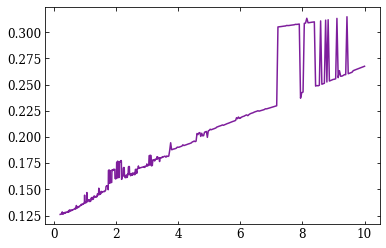

In [80]:
surf_0 = np.load('./surf_025_long.np.npy')
surf_1 = np.load('./surf_025_3_6.np.npy')
surf_2 = np.load('./surf_025_6_10.np.npy')
ntes_0 = np.load('./ntes_025_long.np.npy')
ntes_1 = np.load('./ntes_025_3_6.np.npy')
ntes_2 = np.load('./ntes_025_6_10.np.npy')

res_0 = np.load('./res_025_long.np.npy')
res_1 = np.load('./res_025_3_6.np.npy')
res_2 = np.load('./res_025_6_10.np.npy')

res_n_2 = np.linspace(6, 10, 100)
res_n_1 = np.linspace(3, 6, 100)
res_n_0 = np.linspace(200e-3, 3.5, 500)

fig, ax1 = plt.subplots(figsize=(12,4))

ax2 = ax1.twinx()

ax2.plot(res_n_0, ntes_0, color= 'xkcd:purple')
ax2.plot(res_n_1, ntes_1, color= 'xkcd:purple')
ax2.plot(res_n_2[surf_2 < .003], ntes_2[surf_2 < .003], color= 'xkcd:purple')


ax1.axhline(.25, color='k', linestyle=':')
ax1.plot(res_n_0, surf_0*100, color= 'k')
ax1.plot(res_n_1, surf_1*100, color= 'k')
ax1.plot(res_n_2[surf_2 < .003], surf_2[surf_2 < .003]*100, color= 'k')
ax1.set_ylim(.15, .5)

ax1.set_xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
ax1.set_ylabel('Al Surface Coverage [%]', color='k')

ax2.set_ylabel('Number of QETs', color='xkcd:purple')
ax2.tick_params(axis="y", colors="xkcd:purple")

fig.savefig('./figs/full_surf_vs_r.pdf')


plt.figure()
plt.plot(res_n_0, res_0, color= 'xkcd:purple')
plt.plot(res_n_1, res_1, color= 'xkcd:purple')
plt.plot(res_n_2[surf_2 < .003], res_2[surf_2 < .003], color= 'xkcd:purple')

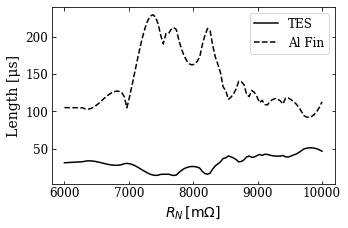

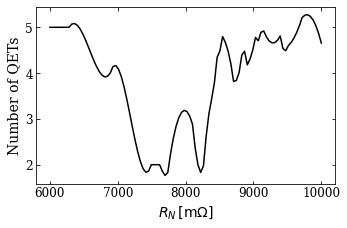

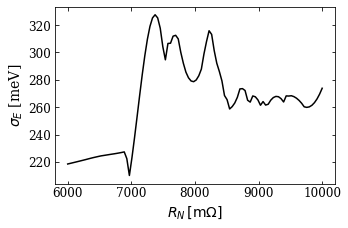

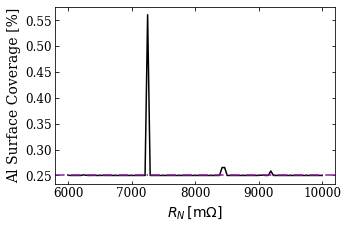

In [33]:
plt.figure(figsize=(5, 5*2/3))
#plt.plot(res_n*1e3, length*1e6)
#plt.plot(res_n*1e3, fin*1e6)
plt.plot(res_n*1e3, savgol_filter(length, 15, 2)*1e6, linestyle='-', color='k',
         label='TES')
plt.ylabel('Length [μs]')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
plt.plot(res_n*1e3, savgol_filter(fin, 15, 2)*1e6, linestyle='--', color='k',
         label='Al Fin')
#plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.legend()
plt.tight_layout()
plt.savefig('./figs/length_vs_rn.pdf')


plt.figure(figsize=(5, 5*2/3))
#plt.plot(res_n*1e3, ntes)
plt.plot(res_n*1e3, savgol_filter(ntes, 15, 2), color='k')
plt.ylabel('Number of QETs')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
#plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.tight_layout()
plt.savefig('./figs/ntes_vs_rn.pdf')

plt.figure(figsize=(5, 5*2/3))
#plt.plot(res_n*1e3, res*1e3)
plt.plot(res_n*1e3, savgol_filter(res, 15, 2)*1e3, color='k')
plt.ylabel(r'$\sigma_E$ [meV]')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
#plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.tight_layout()
plt.savefig('./figs/eres_vs_rn.pdf')


plt.figure(figsize=(5, 5*2/3))
plt.plot(res_n*1e3, surf*100, color='k')
#plt.plot(res_n*1e3, savgol_filter(res, 15, 2)*1e3, color='k')
plt.ylabel('Al Surface Coverage [%]')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
#plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.axhline(.25, color='xkcd:purple', linestyle='-.')
plt.tight_layout()

plt.savefig('./figs/surf_vs_rn.pdf')

### Optimize 0.25% coverage device

optimize both for the effective overlap efficiency factor of 0.13 and 0.45. Ideally, the design parameters should not vary significantly between the two

In [19]:
desired_coverage = 0.0025


l_tes0 = 30e-6
l_tes_bnds = [15e-6, 100e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 20e-6]
l_fin0 = 50e-6
l_fin_bnds = [25e-6, 100e-6]
n_fin0 = 2
n_fin_bnds = [2,6]

res_n = 350e-3
rp = 2e-3
ahole = 4.9e-11

w_overlap0 = 15e-6
w_overlap_bnds = [5e-6, 40e-6]
bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fix_w_overlap=False

safety = 200e-6

det_opt_13_list = []
det_opt_45_list = []

res_n = np.linspace(3.4, 3.6, 20)
for ii in tqdm(range(len(res_n))):
    time.sleep(0.01)
    
    veff_WAloverlap=.13 # theoretical
    det_opt_13, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                        tes_l_overlap0=l_overlap0,
                                                        l_fin0=l_fin0,
                                                        n_fin0=n_fin0,
                                                        per_Al = desired_coverage,   
                                                        fix_w_overlap=fix_w_overlap,
                                                        w_overlap = w_overlap0,
                                                        #tes_width=w,
                                                        abs_type="Si", 
                                                        abs_shape="square", 
                                                        abs_height=1e-3, 
                                                        abs_width=1e-2, 
                                                        w_safety=safety,
                                                        sigma=220000000.0,
                                                        rn=res_n[ii],
                                                        rp=rp,
                                                        L_tot=5e-08,
                                                        ahole=ahole, 
                                                        con_type='ellipse',
                                                        veff_WAloverlap=veff_WAloverlap,
                                                         bounds = bounds, 
                                                        w_overlap_bounds=w_overlap_bnds
                                                         , verbose=False)

    veff_WAloverlap=.45 # measured
    
    det_opt_45, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                        tes_l_overlap0=l_overlap0,
                                                        l_fin0=l_fin0,
                                                        n_fin0=n_fin0,
                                                        per_Al = desired_coverage,   
                                                        fix_w_overlap=fix_w_overlap,
                                                          w_overlap = w_overlap0,
                                                        #tes_width=w,
                                                        abs_type="Si", 
                                                        abs_shape="square", 
                                                        abs_height=1e-3, 
                                                        abs_width=1e-2, 
                                                        w_safety=safety,
                                                        sigma=220000000.0,
                                                        rn=res_n[ii],
                                                        rp=rp,
                                                        L_tot=5e-08,
                                                        ahole=ahole, 
                                                        con_type='ellipse',
                                                        veff_WAloverlap=veff_WAloverlap,
                                                        bounds = bounds, 
                                                        w_overlap_bounds=w_overlap_bnds
                                                         , verbose=False)
    det_opt_13_list.append(det_opt_13)
    det_opt_45_list.append(det_opt_45)


We can see that the TES length and Fin length are largely unchanged between the two designs, only the overlap region changes, which makes sense

In [24]:
absorber = det_opt_13._absorber
qet = det_opt_13.QET
tes = det_opt_13.QET.TES
det = det_opt_13
rn = 5

n_fin = tes.n_fin
l = (np.mean([d.QET.TES.l for d in det_opt_13_list]) \
     + np.mean([d.QET.TES.l for d in det_opt_45_list]))/2
w = (np.mean([d.QET.TES.w for d in det_opt_13_list]) \
     + np.mean([d.QET.TES.w for d in det_opt_45_list]))/2
l_overlap = np.mean([d.QET.TES.l_overlap for d in det_opt_13_list])*1/3 \
     + np.mean([d.QET.TES.l_overlap for d in det_opt_45_list])*2/3
w_overlap = 'circle'
l_fin = (np.mean([d.QET.l_fin for d in det_opt_13_list]) \
     + np.mean([d.QET.l_fin for d in det_opt_45_list]))/2

abso1 = dark.Absorber(name=absorber._name, shape=absorber._shape,
                height=absorber._h, width=absorber._width,
                w_safety=absorber._w_safety)

tes1 = dark.TES(length=l, width=tes.w, l_overlap=l_overlap, n_fin=n_fin, sigma=tes.sigma,
           rn=rn, rsh=tes.rsh, rp=tes.rp, L_tot=tes.L, tload=tes.tload, 
           w_overlap=w_overlap, w_fin_con=tes.w_fin_con, h=tes.h, 
           veff_WAloverlap=tes.veff_WAloverlap, veff_WFinCon=tes.veff_WFinCon, 
           con_type=tes.con_type, material=tes.material, operating_point=tes.fOp,
           alpha=tes.alpha, beta=tes.beta, wempty_fin=tes.wempty_fin, 
           wempty_tes=tes.wempty_tes, n=tes.n, Qp=tes.Qp, t_mc=tes.t_mc,
           w_overlap_stem=tes.w_overlap_stem,  l_c=tes.l_c, 
           l_overlap_pre_ellipse=tes.l_overlap_pre_ellipse)

qet1 = dark.QET(l_fin=l_fin, h_fin=qet.h_fin, TES=tes1, ahole=qet.ahole, ePQP=qet.ePQP,
           eff_absb=qet.eff_absb, nhole_per_fin=qet.nhole_per_fin, 
           type_qp_eff=qet.type_qp_eff)

det1 = dark.Detector(abso1, qet1, n_channel=det._n_channel, w_rail_main=det.w_rail_main, 
                w_railQET=det.w_railQET, bonding_pad_area=det.bonding_pad_area,
                freqs=det.freqs )

print(f"resolution: {det1.calc_res()*1e3:.1f} [meV]")
print(f"TES Length = {det1.QET.TES.l*1e6:.1f} [μm]")
print(f"Overlap Legth = {det1.QET.TES.l_overlap*1e6:.1f} [μm]")
print(f"Overlap Width = {det1.QET.TES.w_overlap*1e6:.1f} [μm]")
print(f"Fin Length = {det1.QET.l_fin*1e6:.1f} [μm]")
print(f"Fin Height = {det1.QET.h_fin*1e6:.1f} [μm]")
print(f"N Fins = {det1.QET.TES.n_fin}")
print(f'Total Al surface coverage = {det1._fSA_qpabsorb*100:.3f} [%]')
print(f'percent active Al = {det1.fSA_active*100:.3f} [%]')
print(f'percent passive Al = {det1.fSA_passive*100:.3f} [%]')
print(f'TES thermal fall time τ0  = {det1.QET.TES.tau0*1e6:.2f} [μs]')
print(f'TES response time τ-  = {det1.QET.TES.taup_m*1e6:.2f} [μs]')
print(f'Phonon collection time constant = {det1._t_pabsb*1e6:.2f} [μs]')
print(f'Absolute phonon collection energy efficiency = {det1._eEabsb*100:.2f} [%]')
print(f'Number of TESs = {det1.QET.TES.nTES}')
print(f'Rn = {det1.QET.TES.rn*1e3:.1f} [mOhms]')
print(f'Close Packed: {det1._close_packed}')
    

resolution: 211.9 [meV]
TES Length = 36.5 [μm]
Overlap Legth = 19.4 [μm]
Overlap Width = 38.7 [μm]
Fin Length = 83.4 [μm]
Fin Height = 0.6 [μm]
N Fins = 2
Total Al surface coverage = 0.277 [%]
percent active Al = 0.083 [%]
percent passive Al = 0.194 [%]
TES thermal fall time τ0  = 3731.24 [μs]
TES response time τ-  = 51.05 [μs]
Phonon collection time constant = 132.04 [μs]
Absolute phonon collection energy efficiency = 7.40 [%]
Number of TESs = 8
Rn = 5000.0 [mOhms]
Close Packed: False


## Non-equally spaced devices

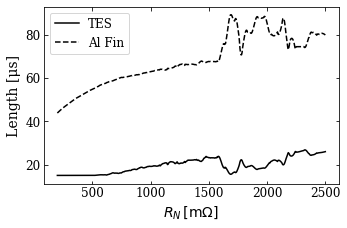

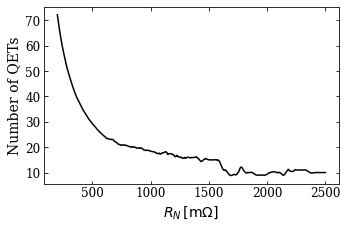

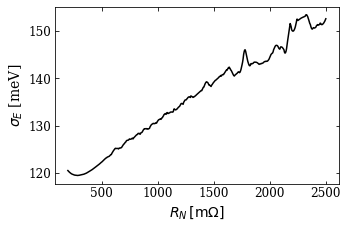

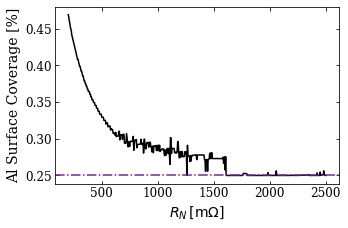

In [2]:
desired_coverage = 0.0025


l_tes0 = 30e-6
l_tes_bnds = [15e-6, 3000e-6]
l_overlap0 = 6e-6
l_overlap_bnds = [5e-06, 20e-6]
l_fin0 = 30e-6
l_fin_bnds = [25e-6, 400e-6]
n_fin0 = 2
n_fin_bnds = [2,6]


rp = 2e-3
ahole = 4.9e-11

w_overlap0 = 'circle'
w_overlap_bnds = [5e-6, 40e-6]
bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fix_w_overlap=True

safety = 200e-6
veff_WAloverlap=.13 # theoretical

res = []
length = []
overlap = []
fin = []
nf = []
surf = []
ntes = []


res_n = np.linspace(200e-3, 2.5, 500)
equal_spaced = False

for ii in tqdm(range(len(res_n))):
    time.sleep(0.01)
    det1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                        tes_l_overlap0=l_overlap0,
                                                        l_fin0=l_fin0,
                                                        n_fin0=n_fin0,
                                                        per_Al = desired_coverage,   
                                                        fix_w_overlap=fix_w_overlap,
                                                        w_overlap = w_overlap0,
                                                        #tes_width=w,
                                                        abs_type="Si", 
                                                        abs_shape="square", 
                                                        abs_height=1e-3, 
                                                        abs_width=1e-2, 
                                                        w_safety=safety,
                                                        sigma=220000000.0,
                                                        rn=res_n[ii],
                                                        rp=rp,
                                                        L_tot=5e-08,
                                                        ahole=ahole, 
                                                        con_type='ellipse',
                                                        veff_WAloverlap=veff_WAloverlap,
                                                         bounds = bounds, 
                                                        w_overlap_bounds=w_overlap_bnds, 
                                                        equal_spaced = equal_spaced,
                                                          verbose=False)
    res.append(det1.calc_res())
    length.append(det1.QET.TES.l)
    overlap.append(det1.QET.TES.l_overlap)
    fin.append(det1.QET.l_fin)
    nf.append(det1.QET.TES.n_fin)
    surf.append(det1._fSA_qpabsorb)
    ntes.append(det1.QET.TES.nTES)
res=np.array(res)
length=np.array(length)
overlap=np.array(overlap)
fin=np.array(fin)
nf=np.array(nf)
surf=np.array(surf)
ntes=np.array(ntes) 

np.save('norm_r_025_200_2_5.np', res_n)
np.save('res_025_200_2_5.np', res)
np.save('length_025_200_2_5.np', length)
np.save('overlap_025_200_2_5.np', overlap)
np.save('fin_025_200_2_5.np', fin)
np.save('surf_025_200_2_5.np', surf)

np.save('ntes_025_200_2_5.np', ntes)
np.save('nfin_025_200_2_5.np', nf)
                   
    

plt.figure(figsize=(5, 5*2/3))
#plt.plot(res_n*1e3, length*1e6)
#plt.plot(res_n*1e3, fin*1e6)
plt.plot(res_n*1e3, savgol_filter(length, 15, 2)*1e6, linestyle='-', color='k',
         label='TES')
plt.ylabel('Length [μs]')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
plt.plot(res_n*1e3, savgol_filter(fin, 15, 2)*1e6, linestyle='--', color='k',
         label='Al Fin')
#plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.legend()
plt.tight_layout()
plt.savefig('./figs/length_vs_rn.pdf')


plt.figure(figsize=(5, 5*2/3))
#plt.plot(res_n*1e3, ntes)
plt.plot(res_n*1e3, savgol_filter(ntes, 15, 2), color='k')
plt.ylabel('Number of QETs')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
#plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.tight_layout()
#plt.savefig('./figs/ntes_vs_rn.pdf')

plt.figure(figsize=(5, 5*2/3))
#plt.plot(res_n*1e3, res*1e3)
plt.plot(res_n*1e3, savgol_filter(res, 15, 2)*1e3, color='k')
plt.ylabel(r'$\sigma_E$ [meV]')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
#plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.tight_layout()
#plt.savefig('./figs/eres_vs_rn.pdf')


plt.figure(figsize=(5, 5*2/3))
plt.plot(res_n*1e3, surf*100, color='k')
#plt.plot(res_n*1e3, savgol_filter(res, 15, 2)*1e3, color='k')
plt.ylabel('Al Surface Coverage [%]')
plt.xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
#plt.axvline(400, color='xkcd:purple', linestyle='-.')
plt.axhline(.25, color='xkcd:purple', linestyle='-.')
plt.tight_layout()

#plt.savefig('./figs/surf_vs_rn.pdf')    

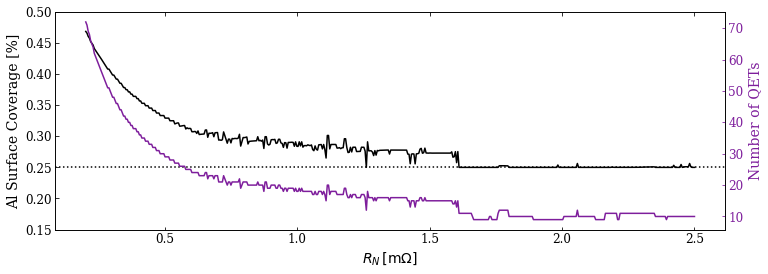

In [3]:
fig, ax1 = plt.subplots(figsize=(12,4))

ax2 = ax1.twinx()

ax2.plot(res_n, ntes, color= 'xkcd:purple')



ax1.axhline(.25, color='k', linestyle=':')
ax1.plot(res_n, surf*100, color= 'k')

ax1.set_ylim(.15, .5)

ax1.set_xlabel(r'$R_N\, [\mathrm{m}\Omega]$')
ax1.set_ylabel('Al Surface Coverage [%]', color='k')

ax2.set_ylabel('Number of QETs', color='xkcd:purple')
ax2.tick_params(axis="y", colors="xkcd:purple")

fig.savefig('./figs/full_surf_vs_r_not_even.pdf')

In [ ]:
desired_coverage = 0.0025


l_tes0 = 30e-6
l_tes_bnds = [15e-6, 100e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 20e-6]
l_fin0 = 50e-6
l_fin_bnds = [25e-6, 100e-6]
n_fin0 = 2
n_fin_bnds = [2,6]

res_n = 350e-3
rp = 2e-3
ahole = 4.9e-11

w_overlap0 = 15e-6
w_overlap_bnds = [5e-6, 40e-6]
bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fix_w_overlap=False

safety = 200e-6

det_opt_13_list = []
det_opt_45_list = []

res_n = np.linspace(1.6, 1.75, 20)
for ii in tqdm(range(len(res_n))):
    time.sleep(0.01)
    
    veff_WAloverlap=.13 # theoretical
    det_opt_13, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                        tes_l_overlap0=l_overlap0,
                                                        l_fin0=l_fin0,
                                                        n_fin0=n_fin0,
                                                        per_Al = desired_coverage,   
                                                        fix_w_overlap=fix_w_overlap,
                                                        w_overlap = w_overlap0,
                                                        #tes_width=w,
                                                        abs_type="Si", 
                                                        abs_shape="square", 
                                                        abs_height=1e-3, 
                                                        abs_width=1e-2, 
                                                        w_safety=safety,
                                                        sigma=220000000.0,
                                                        rn=res_n[ii],
                                                        rp=rp,
                                                        L_tot=5e-08,
                                                        ahole=ahole, 
                                                        con_type='ellipse',
                                                        veff_WAloverlap=veff_WAloverlap,
                                                         bounds = bounds, 
                                                        w_overlap_bounds=w_overlap_bnds
                                                         , verbose=False)

    veff_WAloverlap=.45 # measured
    
    det_opt_45, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                        tes_l_overlap0=l_overlap0,
                                                        l_fin0=l_fin0,
                                                        n_fin0=n_fin0,
                                                        per_Al = desired_coverage,   
                                                        fix_w_overlap=fix_w_overlap,
                                                          w_overlap = w_overlap0,
                                                        #tes_width=w,
                                                        abs_type="Si", 
                                                        abs_shape="square", 
                                                        abs_height=1e-3, 
                                                        abs_width=1e-2, 
                                                        w_safety=safety,
                                                        sigma=220000000.0,
                                                        rn=res_n[ii],
                                                        rp=rp,
                                                        L_tot=5e-08,
                                                        ahole=ahole, 
                                                        con_type='ellipse',
                                                        veff_WAloverlap=veff_WAloverlap,
                                                        bounds = bounds, 
                                                        w_overlap_bounds=w_overlap_bnds
                                                         , verbose=False)
    det_opt_13_list.append(det_opt_13)
    det_opt_45_list.append(det_opt_45)


In [ ]:
absorber = det_opt_13._absorber
qet = det_opt_13.QET
tes = det_opt_13.QET.TES
det = det_opt_13
rn = 1.65
equal_spaced=False

n_fin = tes.n_fin
l = (np.mean([d.QET.TES.l for d in det_opt_13_list]) \
     + np.mean([d.QET.TES.l for d in det_opt_45_list]))/2
w = (np.mean([d.QET.TES.w for d in det_opt_13_list]) \
     + np.mean([d.QET.TES.w for d in det_opt_45_list]))/2
l_overlap = np.mean([d.QET.TES.l_overlap for d in det_opt_13_list])*1/3 \
     + np.mean([d.QET.TES.l_overlap for d in det_opt_45_list])*2/3
w_overlap = 'circle'
l_fin = (np.mean([d.QET.l_fin for d in det_opt_13_list]) \
     + np.mean([d.QET.l_fin for d in det_opt_45_list]))/2

abso1 = dark.Absorber(name=absorber._name, shape=absorber._shape,
                height=absorber._h, width=absorber._width,
                w_safety=absorber._w_safety)

tes1 = dark.TES(length=l, width=tes.w, l_overlap=l_overlap, n_fin=n_fin, sigma=tes.sigma,
           rn=rn, rsh=tes.rsh, rp=tes.rp, L_tot=tes.L, tload=tes.tload, 
           w_overlap=w_overlap, w_fin_con=tes.w_fin_con, h=tes.h, 
           veff_WAloverlap=tes.veff_WAloverlap, veff_WFinCon=tes.veff_WFinCon, 
           con_type=tes.con_type, material=tes.material, operating_point=tes.fOp,
           alpha=tes.alpha, beta=tes.beta, wempty_fin=tes.wempty_fin, 
           wempty_tes=tes.wempty_tes, n=tes.n, Qp=tes.Qp, t_mc=tes.t_mc,
           w_overlap_stem=tes.w_overlap_stem,  l_c=tes.l_c, 
           l_overlap_pre_ellipse=tes.l_overlap_pre_ellipse)

qet1 = dark.QET(l_fin=l_fin, h_fin=qet.h_fin, TES=tes1, ahole=qet.ahole, ePQP=qet.ePQP,
           eff_absb=qet.eff_absb, nhole_per_fin=qet.nhole_per_fin, 
           type_qp_eff=qet.type_qp_eff)

det1 = dark.Detector(abso1, qet1, n_channel=det._n_channel, w_rail_main=det.w_rail_main, 
                w_railQET=det.w_railQET, bonding_pad_area=det.bonding_pad_area,
                freqs=det.freqs , equal_spaced=equal_spaced)

print(f"resolution: {det1.calc_res()*1e3:.1f} [meV]")
print(f"TES Length = {det1.QET.TES.l*1e6:.1f} [μm]")
print(f"Overlap Legth = {det1.QET.TES.l_overlap*1e6:.1f} [μm]")
print(f"Overlap Width = {det1.QET.TES.w_overlap*1e6:.1f} [μm]")
print(f"Fin Length = {det1.QET.l_fin*1e6:.1f} [μm]")
print(f"Fin Height = {det1.QET.h_fin*1e6:.1f} [μm]")
print(f"N Fins = {det1.QET.TES.n_fin}")
print(f'Total Al surface coverage = {det1._fSA_qpabsorb*100:.3f} [%]')
print(f'percent active Al = {det1.fSA_active*100:.3f} [%]')
print(f'percent passive Al = {det1.fSA_passive*100:.3f} [%]')
print(f'TES thermal fall time τ0  = {det1.QET.TES.tau0*1e6:.2f} [μs]')
print(f'TES response time τ-  = {det1.QET.TES.taup_m*1e6:.2f} [μs]')
print(f'Phonon collection time constant = {det1._t_pabsb*1e6:.2f} [μs]')
print(f'Absolute phonon collection energy efficiency = {det1._eEabsb*100:.2f} [%]')
print(f'Number of TESs = {det1.QET.TES.nTES}')
print(f'Rn = {det1.QET.TES.rn*1e3:.1f} [mOhms]')
#print(f'Close Packed: {det1._close_packed}')

### Plots

In [ ]:
n = 25

l = np.linspace(5e-6, 50e-6, n)
l_f = np.linspace(30e-6, 100e-6, n)
l_overlap = np.linspace(5e-6, 18e-6, n)

plot.plot_loverlap_vs_lfin(l_overlap, l_f, det_opt_1, val='energy')
plot.plot_ltes_vs_lfin(l, l_f, det_opt_1, val='energy')
plot.plot_ltes_vs_loverlap(l, l_overlap, det_opt_1, val='energy')


plot.plot_ltes_vs_lfin(l, l_f, det_opt_1, val='al')


### 2 channel device

In [3]:
desired_coverage = 0.0025

l_tes0 = 100e-6
l_tes_bnds = [5e-6, 300e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 40e-6]
l_fin0 = 100e-6
l_fin_bnds = [25e-6, 500e-6]
n_fin0 = 4
n_fin_bnds = [2,6]

res_n = 350e-3
rp = 2e-3
ahole = 4.9e-11


bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fixrn=True

veff_WAloverlap=.13 # theoretical
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fixrn=fixrn,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                    n_channel=2,
                                                     bounds = bounds)

veff_WAloverlap=.45 # measured
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fixrn=fixrn,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="square", 
                                                    abs_height=1e-3, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                      n_channel=2,
                                                    bounds = bounds)


Effective W/Al volume = 0.13
resolution: 103.3 [meV]
TES Length = 16.3 [μm]
Overlap Legth = 10.1 [μm]
Fin Length = 41.2 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 0.369 [%]
Absolute phonon collection energy efficiency = 13.63 [%]
Number of TESs = 45
Rn = 350.0 [mOhms]
Close Packed: False
Phase margin = 1948.2 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


Effective W/Al volume = 0.45
resolution: 154.6 [meV]
TES Length = 21.1 [μm]
Overlap Legth = 6.8 [μm]
Fin Length = 37.0 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 0.395 [%]
Absolute phonon collection energy efficiency = 12.56 [%]
Number of TESs = 58
Rn = 350.0 [mOhms]
Close Packed: False
Phase margin = 1371.6 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


